In [1]:
# chargement de bibliothéques 
"""
instruction specifique pour utiliser matplotlib dans un notebook 
quand on utilise les notebooks Jupyter pour utiliser Matplotlib
"""
%matplotlib inline  

import numpy as np  # Chargement de numpy
import matplotlib.pyplot as plt # import de Matplotlib
from sklearn import datasets # chargement du package datasets contenant plusieurs jeu de données
from sklearn.linear_model import LogisticRegression # import de classe LogisticRegression qui permet d'en entrainer

In [2]:
# importer le jeux données 
iris = datasets.load_iris()

In [3]:
X = iris.data[:, :2] # Utiliser les deux premiers colonnes afin d'avoir un problème de classification binaire. 
y = (iris.target != 0) * 1 # re-etiquettage des fleurs pour se retrouver avec deux classes au lieu de trois

Text(0, 0.5, 'Sepal Width')

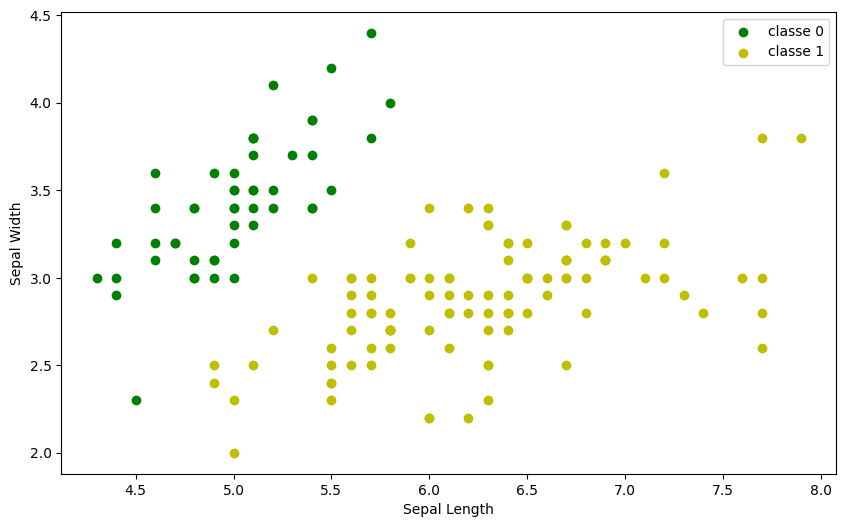

In [4]:
plt.figure(figsize=(10,6)) # Taille de la figure
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='g', label='0') # En Vert les fleurs ayant l'étiquette 0
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='y', label='1') # en Jaune les fleurs ayant l'étiquette 1
plt.legend(labels = ("classe 0", "classe 1"));
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")

In [5]:
model = LogisticRegression(C=1e20) # construction d'un objet de Régression logistique

In [6]:
%time model.fit(X, y) # Entrainement du modèle
# la fonction %time est juste pour calculer le temps pris pour entrainer le modèle

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 13 ms


LogisticRegression(C=1e+20)

In [7]:
model.intercept_, model.coef_

(array([-134.10250544]), array([[ 69.83261087, -79.81650518]]))

In [8]:
# définition de quatre observations
Iries_To_Predict = [
    [5.5, 2.5],
    [7, 3],
    [3,2],
    [5,3]
]

# demande de prédiction
model.predict(Iries_To_Predict)

array([1, 1, 0, 0])

In [11]:
#Dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

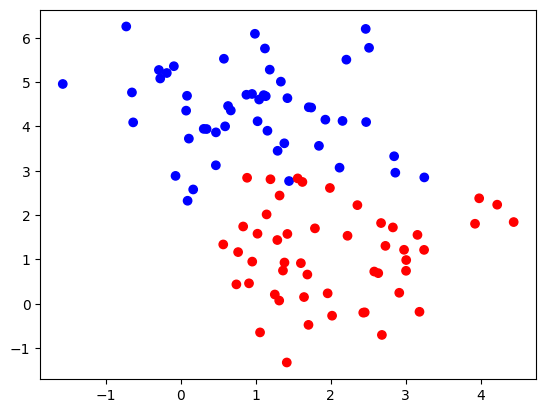

In [10]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))
plt.scatter(X[:,0], X[:, 1], c=y, cmap='bwr')

In [12]:
#Modele
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [13]:
def initialisation(X):
  W = np.random.randn(X.shape[1], 1)
  b = np.random.randn(1)
  return (W, b)

In [14]:
def forward_propagation(X, W, b):
  Z = X.dot(W) + b
  A = sigmoid(Z)
  return A

In [15]:
#Fonction Cout et Gradients
def log_loss(y, A):
  return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [16]:
def gradients(X, A, y):
  dW = 1/len(y) * np.dot(X.T, A - y)
  db = 1/len(y) * np.sum(A - y)
  return (dW, db)

In [17]:
#Optimisation (Descente de Gradient)
def optimisation(X, W, b, A, y, learning_rate):
  dW, db = gradients(X, A, y)
  W = W - learning_rate * dW
  b = b - learning_rate * db
  return (W, b)

In [18]:
#Prédiction et visualisation
def predict(X, W, b):
  A = forward_propagation(X, W, b)
  return A >= 0.5

In [19]:
def visualisation(X, y, W, b):
  resolution = 300
  fig, ax = plt.subplots(figsize=(9, 6))
  ax.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k')

  #limites du graphique
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  # meshgrid
  x1 = np.linspace(xlim[0], xlim[1], resolution)
  x2 = np.linspace(ylim[0], ylim[1], resolution)
  X1, X2 = np.meshgrid(x1, x2)

  # assembler les 2 variables
  XX = np.vstack((X1.ravel(), X2.ravel())).T

  # Prédictions
  Z = predict(XX, W, b)
  Z = Z.reshape((resolution, resolution))

  ax.pcolormesh(X1, X2, Z, zorder=0, alpha=0.1)
  ax.contour(X1, X2, Z, colors='g')

In [20]:
#Modele final
def regression_logistique(X, y, learning_rate=0.1, n_iter=100):
  
  # Initialisation
  W, b = initialisation(X)
  loss_history = []

  # Entrainement
  for i in range(n_iter):
    A = forward_propagation(X, W, b)
    loss_history.append(log_loss(y, A))
    W, b = optimisation(X, W, b, A, y, learning_rate=0.1)

  # Prediction
  visualisation(X, y, W, b)
  plt.figure(figsize=(9, 6))
  plt.plot(loss_history)
  plt.xlabel('n_iteration')
  plt.ylabel('Log_loss')
  plt.title('Evolution des erreurs')

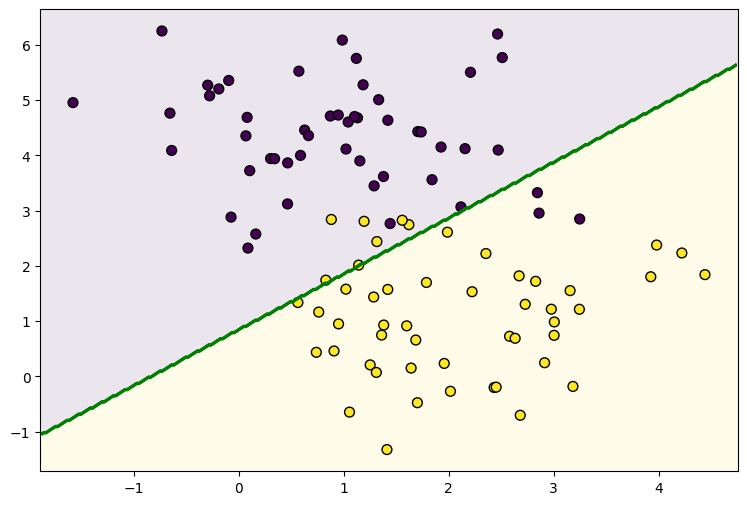

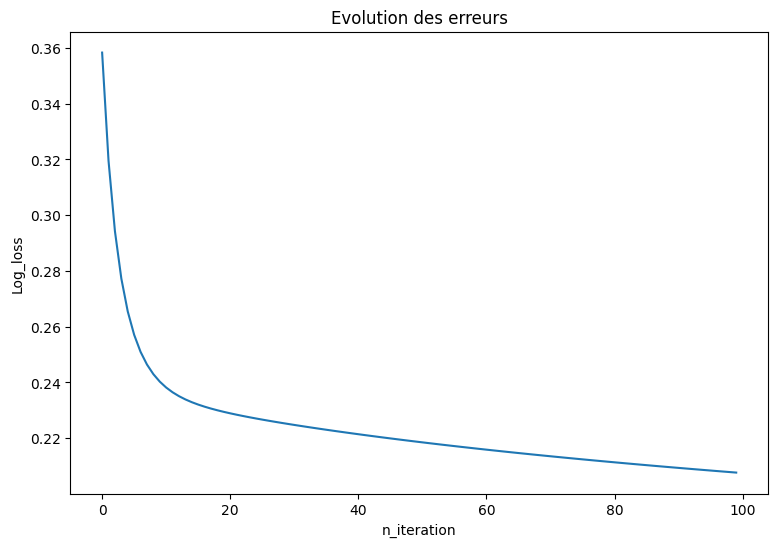

In [21]:
regression_logistique(X, y)

In [1]:
from pulp import LpProblem, LpMinimize, LpVariable, lpSum

# 1. Définir le problème
problem = LpProblem("Minimiser_le_cout", LpMinimize)

# 2. Définir les variables de décision
grain1 = LpVariable("Grain1", lowBound=0, cat="Continuous")
grain2 = LpVariable("Grain2", lowBound=0, cat="Continuous")
grain3 = LpVariable("Grain3", lowBound=0, cat="Continuous")

# 3. Coûts des grains (objectif à minimiser)
costs = {grain1: 41, grain2: 35, grain3: 96}

# 4. Définir les contraintes
# Contenu nutritif par kilo de chaque grain
nutrition_content = {
    "A": {grain1: 2, grain2: 3, grain3: 7},
    "B": {grain1: 1, grain2: 1, grain3: 0},
    "C": {grain1: 5, grain2: 3, grain3: 0},
    "D": {grain1: 0.6, grain2: 0.25, grain3: 1}
}

# Quantités hebdomadaires minimales requises
nutrition_requirements = {
    "A": 1250,
    "B": 250,
    "C": 900,
    "D": 232.5
}

# Ajouter l'objectif (minimiser le coût)
problem += lpSum([costs[g] * g for g in [grain1, grain2, grain3]]), "Cout_Total"

# Ajouter les contraintes nutritives
for nutrient, requirement in nutrition_requirements.items():
    problem += lpSum([nutrition_content[nutrient][g] * g for g in [grain1, grain2, grain3]]) >= requirement, f"Contraint_{nutrient}"

# 5. Résoudre le problème
problem.solve()

# 6. Afficher les résultats
print("Statut de la solution :", problem.status)
print("Quantité de Grain 1 :", grain1.varValue)
print("Quantité de Grain 2 :", grain2.varValue)
print("Quantité de Grain 3 :", grain3.varValue)
print("Coût total :", problem.objective.value())


Statut de la solution : 1
Quantité de Grain 1 : 200.0
Quantité de Grain 2 : 50.0
Quantité de Grain 3 : 100.0
Coût total : 19550.0


In [3]:
import pulp

# === Définition du problème ===
prob = pulp.LpProblem("Probleme_Entreposage", pulp.LpMaximize)

# === Variables de décision ===
# Quantités achetées, vendues, et entreposées pour chaque période (t = 1, 2, 3)
x = pulp.LpVariable.dicts("Achat", [1, 2, 3], lowBound=0, cat="Continuous")
y = pulp.LpVariable.dicts("Vente", [1, 2, 3], lowBound=0, cat="Continuous")
s = pulp.LpVariable.dicts("Stock", [1, 2, 3], lowBound=0, upBound=60, cat="Continuous")

# === Données ===
prix = {1: 4, 2: 9, 3: 6}  # Prix par période
stock_initial = 30  # Stock initial
cout_entrepot = 1  # Coût d'entreposage par période

# === Fonction objectif ===
# Maximiser le profit total
prob += (
    pulp.lpSum([y[t] * prix[t] - x[t] * prix[t] - s[t] * cout_entrepot for t in [1, 2, 3]])
), "Profit_Total"

# === Contraintes ===
# Conservation du stock
prob += s[1] == stock_initial + x[1] - y[1], "Stock_Period_1"
prob += s[2] == s[1] + x[2] - y[2], "Stock_Period_2"
prob += s[3] == s[2] + x[3] - y[3], "Stock_Period_3"

# Capacité maximale de l'entrepôt
prob += s[1] <= 60, "Capacite_Entrepot_1"
prob += s[2] <= 60, "Capacite_Entrepot_2"
prob += s[3] <= 60, "Capacite_Entrepot_3"

# === Résolution ===
prob.solve()

# === Résultats ===
print("Statut de la solution :", pulp.LpStatus[prob.status])
for t in [1, 2, 3]:
    print(f"Période {t} :")
    print(f"  Quantité achetée : {x[t].varValue}")
    print(f"  Quantité vendue   : {y[t].varValue}")
    print(f"  Stock entreposé   : {s[t].varValue}")

# Coût total
print("Profit total :", pulp.value(prob.objective))


Statut de la solution : Optimal
Période 1 :
  Quantité achetée : 30.0
  Quantité vendue   : 0.0
  Stock entreposé   : 60.0
Période 2 :
  Quantité achetée : 0.0
  Quantité vendue   : 60.0
  Stock entreposé   : 0.0
Période 3 :
  Quantité achetée : -0.0
  Quantité vendue   : 0.0
  Stock entreposé   : 0.0
Profit total : 360.0
